In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats
import random
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import cohen_kappa_score,classification_report,f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,mean_absolute_error,mean_absolute_percentage_error,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# Uploading DataSet 

In [2]:
churn=pd.read_csv('capstone.csv')

In [3]:
churn.columns

Index(['Unnamed: 0', 'device', 'first_payment_amount', 'age', 'city',
       'number_of_cards', 'payments_initiated', 'payments_failed',
       'payments_completed', 'payments_completed_amount_first_7days',
       'reward_purchase_count_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'user_id', 'is_churned'],
      dtype='object')

In [4]:
churn['user_id'].nunique()

104143

# Unnamed: 0 Was extra added feature and user_id seems insignificiant for the further analysis so dropping them.

In [5]:
churn=churn.drop(['Unnamed: 0','user_id'],axis=1)
churn.head()

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,is_churned
0,samsung,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,NaN,0.0,False,3.0,0.0,1,0,0
1,xiaomi,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,0
2,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,True,0.0,0.0,0,1,0
3,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,False,0.0,0.0,1,1,0
4,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,1.0,1,1,0


In [6]:
churn.shape

(104143, 17)

Data has 104143 Records and 17 Features.

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104143 entries, 0 to 104142
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   device                                 104025 non-null  object 
 1   first_payment_amount                   104143 non-null  int64  
 2   age                                    104001 non-null  float64
 3   city                                   98301 non-null   object 
 4   number_of_cards                        103671 non-null  float64
 5   payments_initiated                     103671 non-null  float64
 6   payments_failed                        103671 non-null  float64
 7   payments_completed                     103671 non-null  float64
 8   payments_completed_amount_first_7days  103671 non-null  float64
 9   reward_purchase_count_first_7days      80879 non-null   float64
 10  coins_redeemed_first_7days             103671 non-null  

In [8]:
churn['is_referral'].unique()

array([False,  True])

In [9]:
churn['is_referral'].replace({False:0,True:1},inplace=True)
churn['is_referral']

0         0
1         1
2         1
3         0
4         0
         ..
104138    1
104139    1
104140    0
104141    0
104142    0
Name: is_referral, Length: 104143, dtype: int64

is_referral was in Boolian type we converted it in 0 and 1 to make it significiant for the analysis.

# Data Types Conversion

In [10]:
churn['given_permission_1']=churn['given_permission_1'].astype('object')


In [11]:
churn['given_permission_2']=churn['given_permission_2'].astype('object')


In [12]:
churn['is_referral']=churn['is_referral'].astype('object')


In [13]:
#Target Variable
churn['is_churned']=churn['is_churned'].astype(object)


In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104143 entries, 0 to 104142
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   device                                 104025 non-null  object 
 1   first_payment_amount                   104143 non-null  int64  
 2   age                                    104001 non-null  float64
 3   city                                   98301 non-null   object 
 4   number_of_cards                        103671 non-null  float64
 5   payments_initiated                     103671 non-null  float64
 6   payments_failed                        103671 non-null  float64
 7   payments_completed                     103671 non-null  float64
 8   payments_completed_amount_first_7days  103671 non-null  float64
 9   reward_purchase_count_first_7days      80879 non-null   float64
 10  coins_redeemed_first_7days             103671 non-null  

# Numrical Summary of the Data.

In [15]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
first_payment_amount,104143.0,34.771353,73.181032,0.0,2.0,12.0,37.0,4370.0
age,104001.0,32.688291,7.821752,20.0,27.0,31.0,36.0,80.0
number_of_cards,103671.0,1.989148,1.871436,0.0,1.0,1.0,3.0,30.0
payments_initiated,103671.0,2.847402,4.223077,1.0,1.0,2.0,3.0,359.0
payments_failed,103671.0,0.439940,1.061101,0.0,0.0,0.0,0.0,30.0
payments_completed,103671.0,1.830676,3.210357,1.0,1.0,1.0,2.0,337.0
payments_completed_amount_first_7days,103671.0,55.965381,130.720128,0.0,3.0,21.0,64.0,11107.0
reward_purchase_count_first_7days,80879.0,2.042075,3.731290,0.0,0.0,1.0,3.0,304.0
coins_redeemed_first_7days,103671.0,22.494102,64.122134,0.0,0.0,3.0,20.0,8857.0
visits_feature_1,101497.0,0.239643,0.624616,0.0,0.0,0.0,0.0,17.0


 These features have many Data points which are far from the mean>>
 (Payment_Initiated,Payment_Completed,Payments_Completed_Amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days)


In [16]:
churn.var()

first_payment_amount                      5355.463497
age                                         61.179798
number_of_cards                              3.502274
payments_initiated                          17.834377
payments_failed                              1.125936
payments_completed                          10.306392
payments_completed_amount_first_7days    17087.751816
reward_purchase_count_first_7days           13.922523
coins_redeemed_first_7days                4111.648116
is_referral                                  0.242613
visits_feature_1                             0.390145
visits_feature_2                             0.198535
given_permission_1                           0.125873
given_permission_2                           0.200125
is_churned                                   0.204551
dtype: float64

In [17]:
churn.cov()

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2
first_payment_amount,5355.463497,31.932038,8.092946,-8.669300,1.245117,-9.883933,6131.979564,22.717927,1657.339281,0.763535,0.198005
age,31.932038,61.179798,2.043606,0.633128,0.290304,0.374911,71.876908,0.997519,21.822470,-0.287134,0.015794
number_of_cards,8.092946,2.043606,3.502274,0.812176,0.120835,0.624949,37.156777,0.845652,16.679366,-0.011746,0.021335
payments_initiated,-8.669300,0.633128,0.812176,17.834377,2.401185,12.056866,109.485621,13.011127,68.042912,0.169746,0.123774
payments_failed,1.245117,0.290304,0.120835,2.401185,1.125936,0.875033,19.019533,0.997269,9.067141,0.027357,0.026474
payments_completed,-9.883933,0.374911,0.624949,12.056866,0.875033,10.306392,77.517578,11.057840,51.314927,0.077113,0.058596
payments_completed_amount_first_7days,6131.979564,71.876908,37.156777,109.485621,19.019533,77.517578,17087.751816,166.737197,5433.729742,2.496048,1.824506
reward_purchase_count_first_7days,22.717927,0.997519,0.845652,13.011127,0.997269,11.057840,166.737197,13.922523,137.804897,0.111413,0.081600
coins_redeemed_first_7days,1657.339281,21.822470,16.679366,68.042912,9.067141,51.314927,5433.729742,137.804897,4111.648116,1.977801,1.310687
visits_feature_1,0.763535,-0.287134,-0.011746,0.169746,0.027357,0.077113,2.496048,0.111413,1.977801,0.390145,0.068410


In [18]:
churn.corr()

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2
first_payment_amount,1.000000,0.055769,0.059109,-0.028059,0.016039,-0.042082,0.641177,0.077890,0.353283,0.016672,0.006061
age,0.055769,1.000000,0.139613,0.019165,0.034971,0.014927,0.070266,0.035497,0.043510,-0.058879,0.004538
number_of_cards,0.059109,0.139613,1.000000,0.102765,0.060850,0.104020,0.151887,0.118612,0.138994,-0.010029,0.025537
payments_initiated,-0.028059,0.019165,0.102765,1.000000,0.535846,0.889308,0.198329,0.752839,0.251273,0.063840,0.065256
payments_failed,0.016039,0.034971,0.060850,0.535846,1.000000,0.256871,0.137120,0.242808,0.133262,0.041034,0.055666
payments_completed,-0.042082,0.014927,0.104020,0.889308,0.256871,1.000000,0.184716,0.829605,0.249277,0.038113,0.040598
payments_completed_amount_first_7days,0.641177,0.070266,0.151887,0.198329,0.137120,0.184716,1.000000,0.322232,0.648258,0.030455,0.031207
reward_purchase_count_first_7days,0.077890,0.035497,0.118612,0.752839,0.242808,0.829605,0.322232,1.000000,0.515899,0.044976,0.045783
coins_redeemed_first_7days,0.353283,0.043510,0.138994,0.251273,0.133262,0.249277,0.648258,0.515899,1.000000,0.049089,0.045603
visits_feature_1,0.016672,-0.058879,-0.010029,0.063840,0.041034,0.038113,0.030455,0.044976,0.049089,1.000000,0.245804


In [19]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104143 entries, 0 to 104142
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   device                                 104025 non-null  object 
 1   first_payment_amount                   104143 non-null  int64  
 2   age                                    104001 non-null  float64
 3   city                                   98301 non-null   object 
 4   number_of_cards                        103671 non-null  float64
 5   payments_initiated                     103671 non-null  float64
 6   payments_failed                        103671 non-null  float64
 7   payments_completed                     103671 non-null  float64
 8   payments_completed_amount_first_7days  103671 non-null  float64
 9   reward_purchase_count_first_7days      80879 non-null   float64
 10  coins_redeemed_first_7days             103671 non-null  

# Numeric Features Extraction from whole Data - (num).

In [20]:
num=churn.select_dtypes(include=np.number)

In [21]:
#num=num.drop('is_churned',axis=1)
num.columns

Index(['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days',
       'reward_purchase_count_first_7days', 'coins_redeemed_first_7days',
       'visits_feature_1', 'visits_feature_2'],
      dtype='object')

# Univariate Analysis.

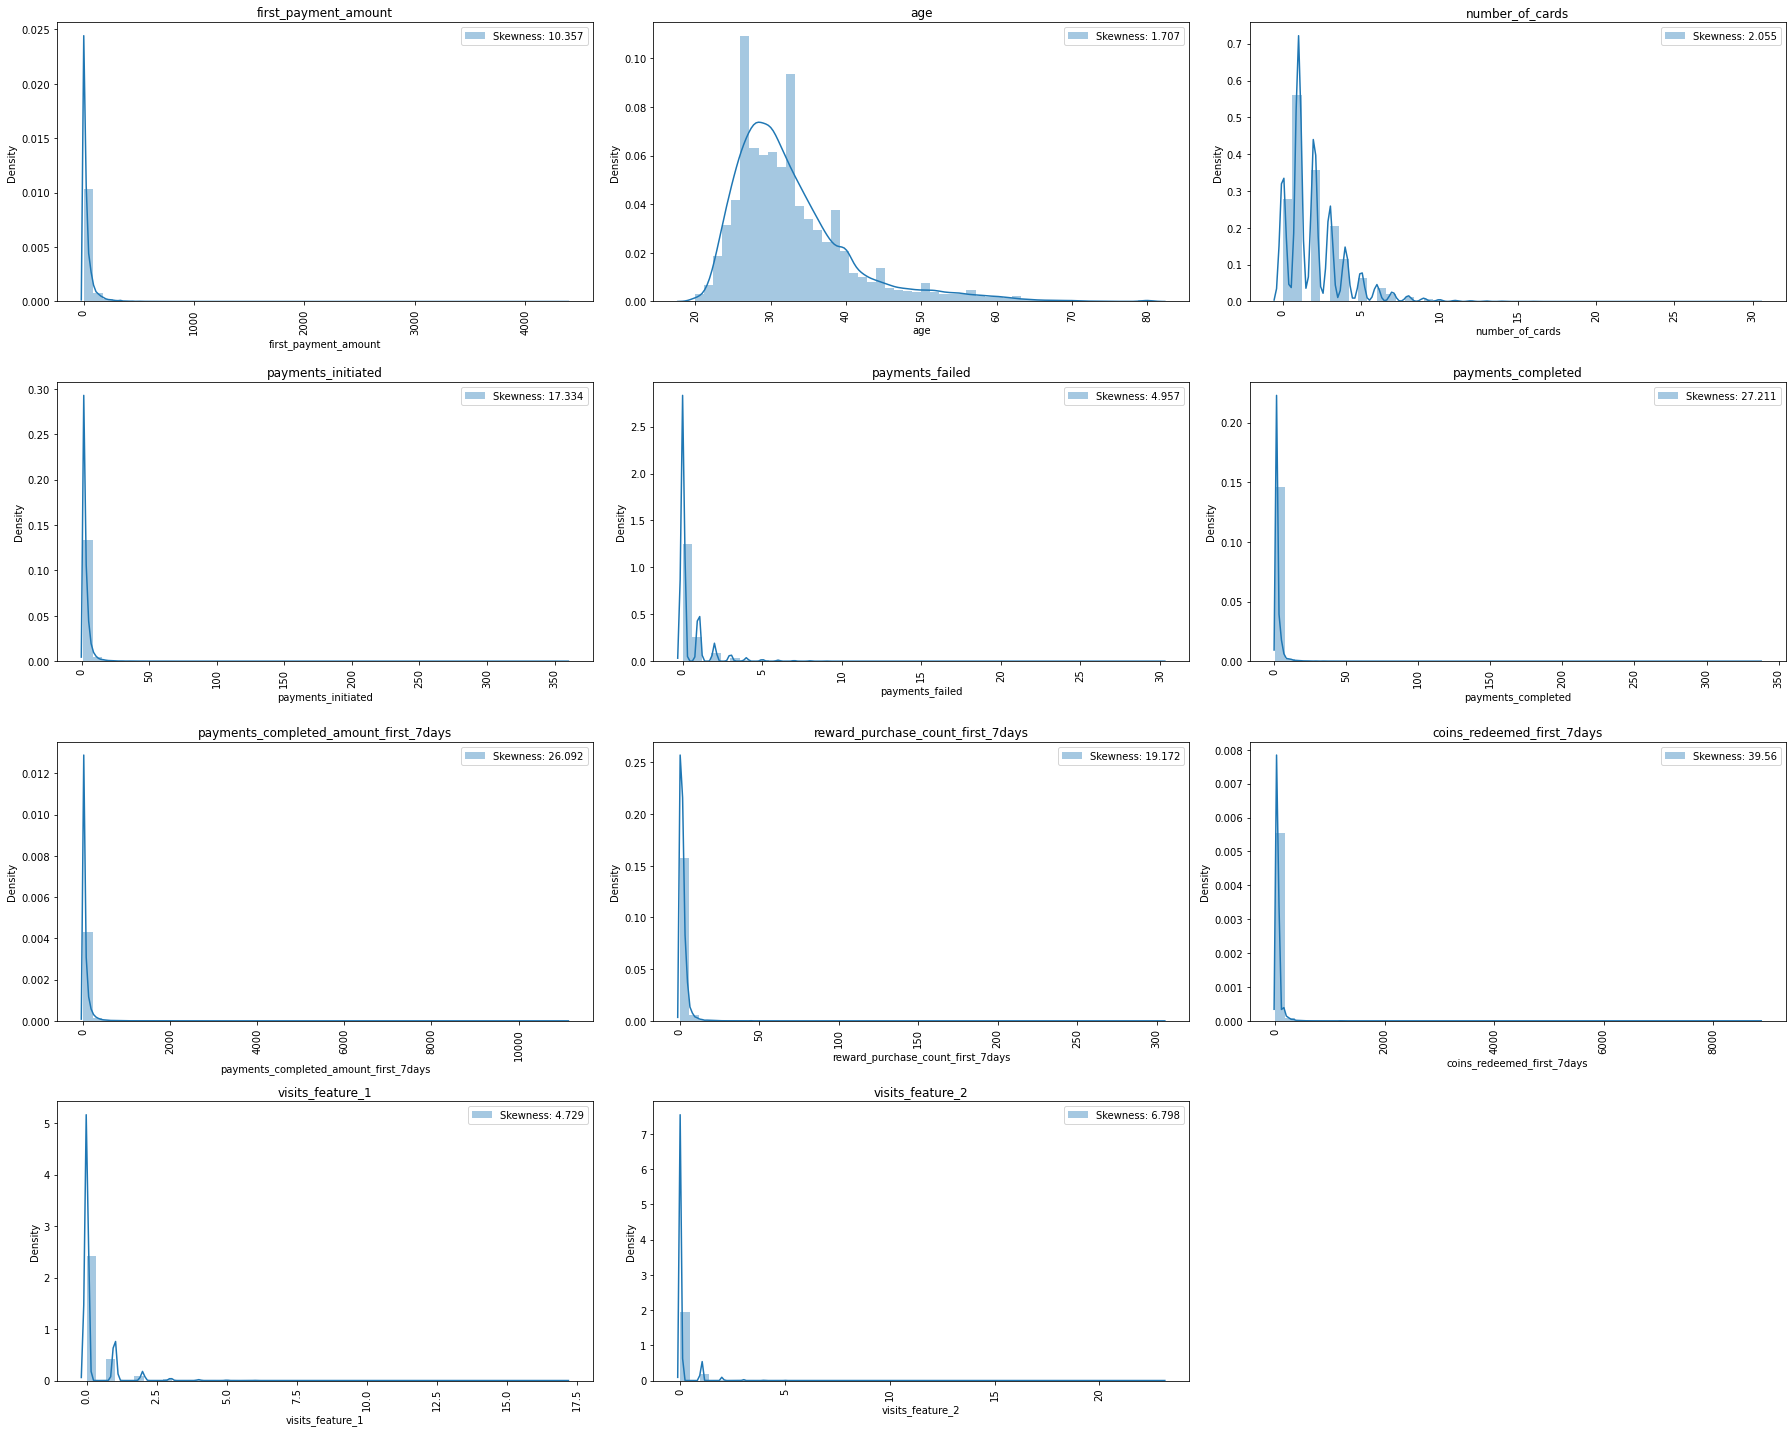

In [22]:
plt.rcParams['figure.figsize']=[25,20]
rows=4
columns=3
iterator=1
for k in num.columns:
    plt.subplot(rows,columns,iterator)
    sns.distplot(churn.loc[:,k],label= 'Skewness:'+' '+str(round(churn[k].skew(),3)))
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()    

From the above charts we can see almost every numric features are highely Skewed.

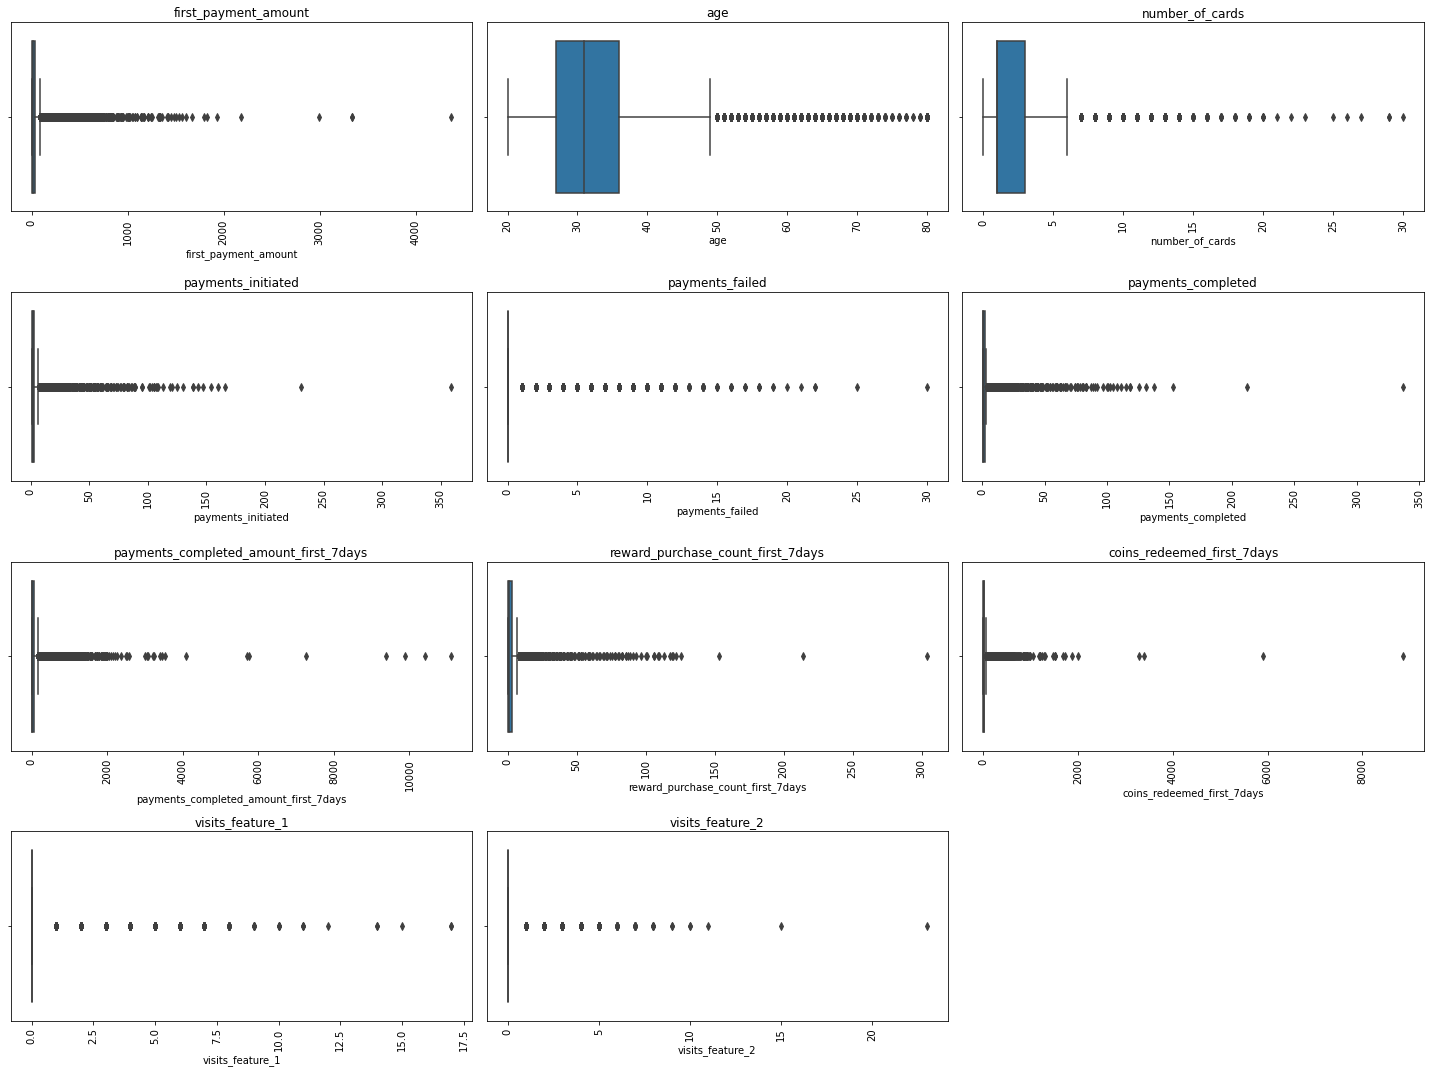

In [23]:
plt.rcParams['figure.figsize']=[20,15]

rows=4
columns=3
iterator=1
for k in num.columns:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(churn.loc[:,k])
    plt.title(k)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()    

Above box plots clearly shows that there are lot of positive outliers in the data .

# Categorical Features Extraction.

In [24]:
cat=churn.select_dtypes(include='object')
cat

,device,city,is_referral,given_permission_1,given_permission_2,is_churned
0,samsung,Ahmedabad,0,1,0,0
1,xiaomi,Surat,1,1,0,0
2,xiaomi,Kullu,1,0,1,0
3,oneplus,Mumbai,0,1,1,0
4,apple,Pune,0,1,1,0
...,...,...,...,...,...,...
104138,samsung,Ongole,1,1,0,1
104139,vivo,Chennai,1,1,0,1
104140,apple,Bangalore,0,1,1,1
104141,samsung,Hyderabad,0,0,1,1


<AxesSubplot:ylabel='device'>

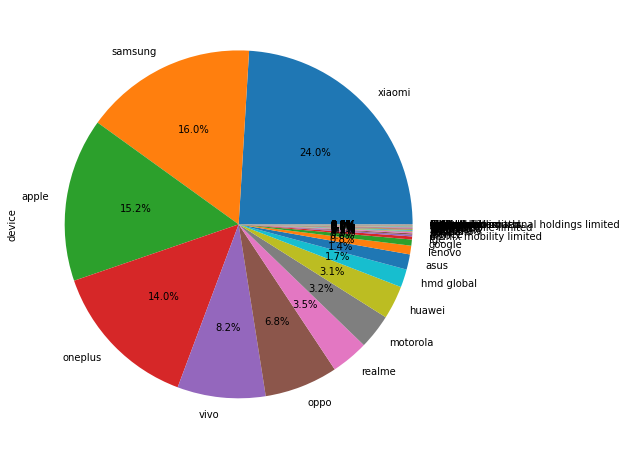

In [25]:
plt.rcParams['figure.figsize']=[10,8]
churn['device'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')


There are many unique values in City feature so we are not including city in univariate right now.

Text(0.98, 29871, '28.68')

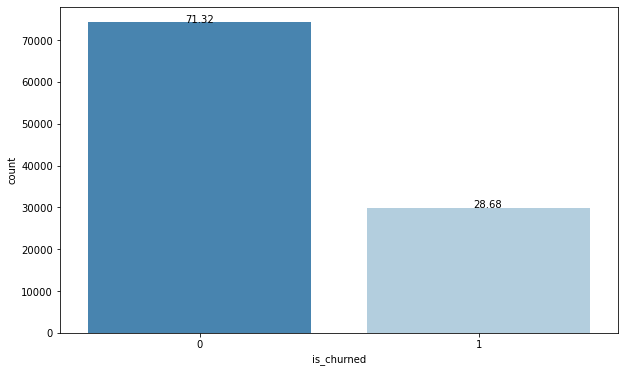

In [26]:
plt.rcParams['figure.figsize']=[10,6]
label=churn['is_churned'].value_counts(normalize=True)
sns.countplot(churn['is_churned'],palette='Blues_r')
plt.text(x = -0.05, y = churn['is_churned'].value_counts()[0]+1, s = round((churn['is_churned'].value_counts(normalize=True)[0]*100),2))
plt.text(x = 0.98, y = churn['is_churned'].value_counts()[1]+2, s = round((churn['is_churned'].value_counts(normalize=True)[1]*100),2))

Target Variable seems a kind of inbalance.

<AxesSubplot:xlabel='given_permission_1', ylabel='count'>

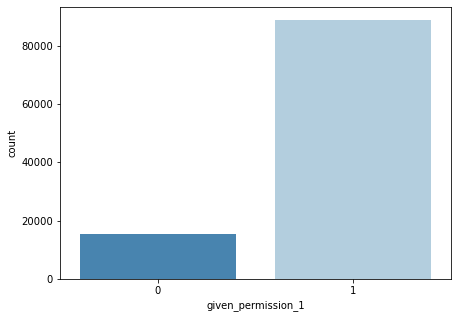

In [27]:
plt.rcParams['figure.figsize']=[7,5]

sns.countplot(churn['given_permission_1'],palette='Blues_r')

<AxesSubplot:xlabel='given_permission_2', ylabel='count'>

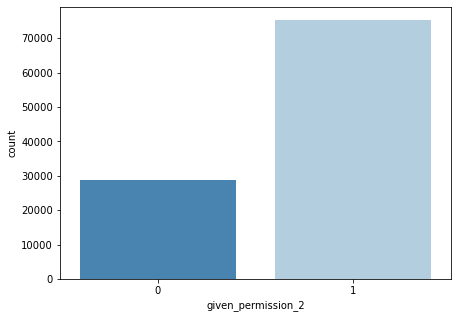

In [28]:
sns.countplot(churn['given_permission_2'],palette='Blues_r')

# Bivariate Analysis

In [29]:
num.columns

Index(['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days',
       'reward_purchase_count_first_7days', 'coins_redeemed_first_7days',
       'visits_feature_1', 'visits_feature_2'],
      dtype='object')

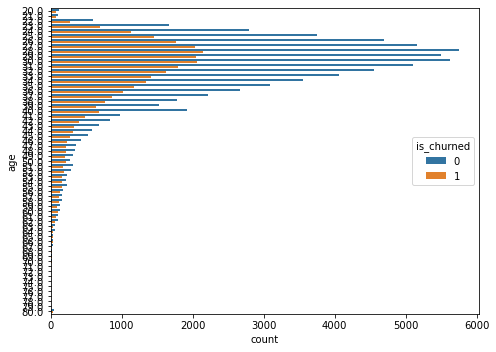

In [30]:
#churn.groupby('is_churned')['age'].mean().plot(kind='bar')
sns.countplot(data=churn,y='age',hue='is_churned')
plt.tight_layout()
plt.show()

In the above chard we can infer that maximum no of customers are from age between 25-35,and quantity of people not churning is much more than the people seems to churn.

<AxesSubplot:xlabel='is_churned'>

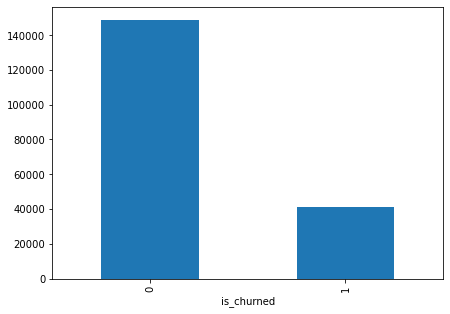

In [31]:
churn.groupby('is_churned')['payments_completed'].sum().plot(kind='bar')
# sns.countplot(data=churn,x='payments_completed',hue='is_churned')
# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='is_churned'>

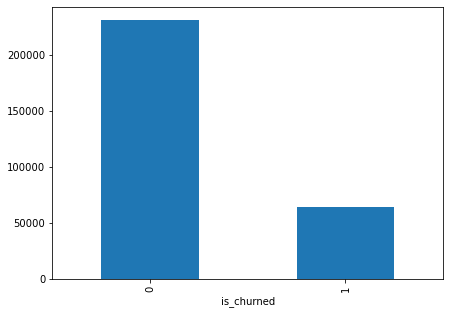

In [32]:
churn.groupby('is_churned')['payments_initiated'].sum().plot(kind='bar')


<AxesSubplot:xlabel='is_churned'>

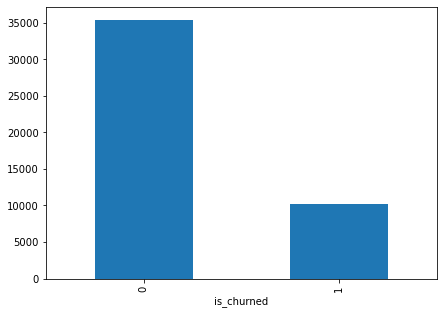

In [33]:
churn.groupby('is_churned')['payments_failed'].sum().plot(kind='bar')


<AxesSubplot:xlabel='is_churned'>

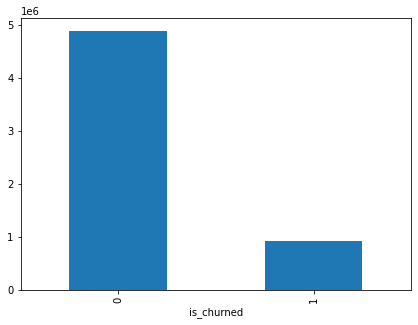

In [34]:
churn.groupby('is_churned')['payments_completed_amount_first_7days'].sum().plot(kind='bar')


<AxesSubplot:xlabel='is_churned'>

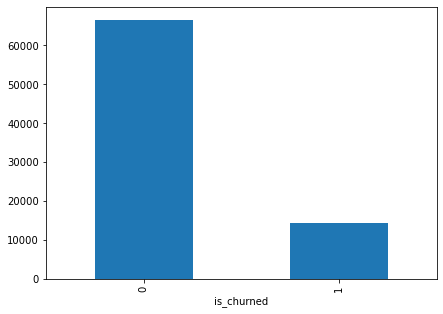

In [35]:
churn.groupby('is_churned')['reward_purchase_count_first_7days'].count().plot(kind='bar')
# sns.countplot(data=churn,x='reward_purchase_count_first_7days',hue='is_churned')
# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='is_churned'>

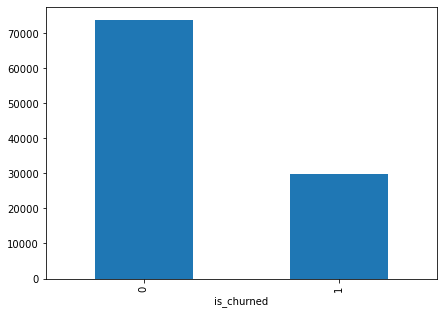

In [36]:
churn.groupby('is_churned')['coins_redeemed_first_7days'].count().plot(kind='bar')


<AxesSubplot:xlabel='payments_initiated', ylabel='payments_completed'>

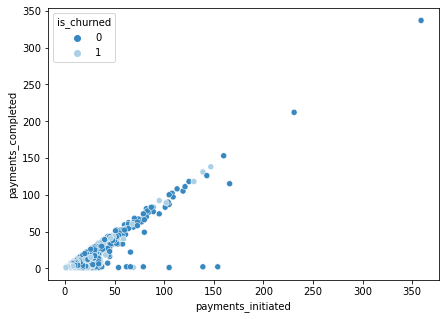

In [37]:
sns.scatterplot(data=churn,x='payments_initiated',y='payments_completed',hue='is_churned',palette='Blues_r')

<AxesSubplot:xlabel='payments_initiated', ylabel='payments_failed'>

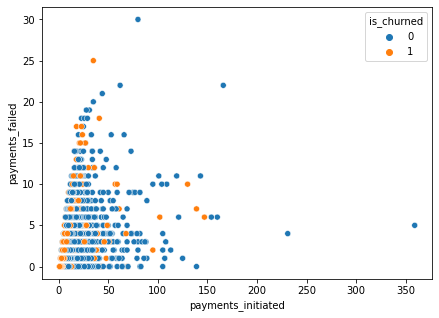

In [38]:
sns.scatterplot(data=churn,x='payments_initiated',y='payments_failed',hue='is_churned')

In [39]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104143 entries, 0 to 104142
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   device                                 104025 non-null  object 
 1   first_payment_amount                   104143 non-null  int64  
 2   age                                    104001 non-null  float64
 3   city                                   98301 non-null   object 
 4   number_of_cards                        103671 non-null  float64
 5   payments_initiated                     103671 non-null  float64
 6   payments_failed                        103671 non-null  float64
 7   payments_completed                     103671 non-null  float64
 8   payments_completed_amount_first_7days  103671 non-null  float64
 9   reward_purchase_count_first_7days      80879 non-null   float64
 10  coins_redeemed_first_7days             103671 non-null  

In [40]:
churn.groupby('is_churned')['is_referral'].describe()

,count,unique,top,freq
is_churned,,,,
0,74274,2,0,46058
1,29869,2,0,14966


<AxesSubplot:xlabel='is_referral', ylabel='count'>

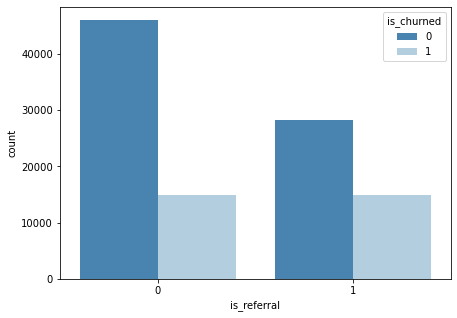

In [41]:
sns.countplot(data=churn,x='is_referral',hue='is_churned',palette='Blues_r')

# Multivariate Analysis

<AxesSubplot:>

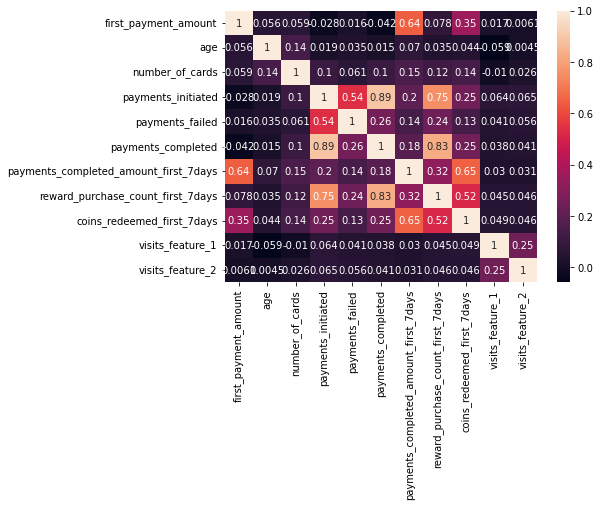

In [42]:
sns.heatmap(churn.corr(),annot=True)

**'Payment completed' is correrated with 'rewards purchase count first 7 days'**---
**'Payment initiated' is highely correrated with 'Payment Completed'**


In [43]:
#sns.pairplot(churn,hue='is_churned')

# Statistical Test for feature significance.

In [44]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare


In [45]:
Test_churn=churn.dropna()

In [46]:
Test_churn.reset_index(inplace=True,drop=True)

In [47]:
Test_churn

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,is_churned
0,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0,1,0
1,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,0,0.0,0.0,1,1,0
2,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,1,1,0
3,oppo,0,20.0,Ahmedabad,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1,1,0
4,samsung,0,20.0,Surat,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74913,apple,26,80.0,Hubli,2.0,2.0,0.0,1.0,26.0,2.0,20.0,0,1.0,1.0,1,1,1
74914,samsung,42,80.0,Pune,1.0,2.0,1.0,1.0,42.0,1.0,3.0,1,0.0,0.0,1,0,1
74915,vivo,47,80.0,Shimoga,0.0,1.0,0.0,1.0,47.0,2.0,20.0,0,0.0,0.0,1,1,1
74916,xiaomi,100,80.0,NCR,0.0,1.0,0.0,1.0,100.0,4.0,70.0,1,0.0,0.0,0,1,1


In [48]:
num=Test_churn.select_dtypes(include=np.number).columns
num=list(num)
num

['first_payment_amount',
 'age',
 'number_of_cards',
 'payments_initiated',
 'payments_failed',
 'payments_completed',
 'payments_completed_amount_first_7days',
 'reward_purchase_count_first_7days',
 'coins_redeemed_first_7days',
 'visits_feature_1',
 'visits_feature_2']

In [49]:
static_val=[]
pvalue=[]
for k in num:
    s1=Test_churn[Test_churn['is_churned']==0][k]
    s2=Test_churn[Test_churn['is_churned']==1][k]
    static,pval=ttest_ind(s1,s2)
    static_val.append(static)
    pvalue.append(pval)
    dic={'static_val':static_val,'pvalue':pvalue}

In [50]:
num_test_df=pd.DataFrame(dic)
num_test_df
num_test_df['Features']=num
num_test_df

,static_val,pvalue,Features
0,8.151746,3.641879e-16,first_payment_amount
1,-11.291340,1.530041e-29,age
2,21.980893,9.560593e-107,number_of_cards
3,14.156278,1.955135e-45,payments_initiated
4,6.966957,3.265293e-12,payments_failed
5,13.053723,6.673892e-39,payments_completed
6,15.085466,2.402029e-51,payments_completed_amount_first_7days
7,13.654968,2.119903e-42,reward_purchase_count_first_7days
8,10.573024,4.146862e-26,coins_redeemed_first_7days
9,10.655091,1.724618e-26,visits_feature_1


In [51]:
cato=Test_churn.select_dtypes(include='object').columns
cato=cato.delete(5)
cato

Index(['device', 'city', 'is_referral', 'given_permission_1',
       'given_permission_2'],
      dtype='object')

In [52]:
p_value=[]
for i in cato:
    obs_val=pd.crosstab(Test_churn[i],Test_churn['is_churned'])
    stat,p_val,dof,exp=chi2_contingency(obs_val.values)
    p_value.append(p_val)

In [53]:
pd.DataFrame(p_value,index=cato,columns=['p_value'])

,p_value
device,3.021941e-61
city,5.305246e-78
is_referral,1.569483e-103
given_permission_1,2.109475e-31
given_permission_2,6.515464e-68


In [54]:
len(Test_churn['payments_initiated'])

74918

# Null Values Treatment

In [55]:
new_churn=churn.copy()

In [56]:
new_churn['device'].fillna(new_churn['device'].mode()[0],inplace=True)

In [57]:
new_churn['age'].fillna(new_churn['age'].median(),inplace=True)

In [58]:
new_churn = new_churn.dropna(axis=0, subset=['visits_feature_1','visits_feature_2','payments_initiated','number_of_cards','payments_failed','payments_completed','payments_completed_amount_first_7days','coins_redeemed_first_7days'])

Some Feature ['visits_feature_1','visits_feature_2','payments_initiated','number_of_cards','payments_failed','payments_completed','payments_completed_amount_first_7days','coins_redeemed_first_7days'] have common records with null values so we dropping those records.

In [59]:
new_churn.drop(['reward_purchase_count_first_7days'],axis=1,inplace=True)

Dropping reward_purchase_count_first_7days as there are more than 21000 null values in the feature and we couldnt find any effect of the feature on our prediction.

In [60]:
new_churn.isna().sum()

device                                      0
first_payment_amount                        0
age                                         0
city                                     5682
number_of_cards                             0
payments_initiated                          0
payments_failed                             0
payments_completed                          0
payments_completed_amount_first_7days       0
coins_redeemed_first_7days                  0
is_referral                                 0
visits_feature_1                            0
visits_feature_2                            0
given_permission_1                          0
given_permission_2                          0
is_churned                                  0
dtype: int64

In [61]:
from sklearn.impute import KNNImputer

In [62]:
new_churn.isna().sum()

device                                      0
first_payment_amount                        0
age                                         0
city                                     5682
number_of_cards                             0
payments_initiated                          0
payments_failed                             0
payments_completed                          0
payments_completed_amount_first_7days       0
coins_redeemed_first_7days                  0
is_referral                                 0
visits_feature_1                            0
visits_feature_2                            0
given_permission_1                          0
given_permission_2                          0
is_churned                                  0
dtype: int64

# Feature Visits_feature_1 and Visits_feature_2 have some null values but contains valuable information so dropping is not the option we will go with KNN Imputer.

In [63]:
from sklearn.impute import KNNImputer


In [64]:
df_cat=new_churn.select_dtypes("object")

In [65]:
df_cat.isnull().sum()

device                   0
city                  5682
is_referral              0
given_permission_1       0
given_permission_2       0
is_churned               0
dtype: int64

In [66]:
df_num=new_churn.select_dtypes(np.number)

In [67]:
ab_1=pd.concat([df_num,df_cat['city']],axis=1)

In [68]:
ab_1.isnull().sum()

first_payment_amount                        0
age                                         0
number_of_cards                             0
payments_initiated                          0
payments_failed                             0
payments_completed                          0
payments_completed_amount_first_7days       0
coins_redeemed_first_7days                  0
visits_feature_1                            0
visits_feature_2                            0
city                                     5682
dtype: int64

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
index_list_city=ab_1[ab_1['city'].isnull()].index.tolist()

In [71]:
x_test_city=ab_1.loc[index_list_city].drop('city',axis=1)

In [72]:
y_test_city=ab_1.loc[index_list_city]['city']

In [73]:
y_test_city.head()

28     NaN
70     NaN
83     NaN
106    NaN
126    NaN
Name: city, dtype: object

In [74]:
xtrain_city=ab_1.dropna().drop("city",axis=1)

In [75]:
ytrain_city=ab_1.dropna()['city']

In [76]:
knn=KNeighborsClassifier(n_neighbors=2000)

In [77]:
knn.fit(xtrain_city,ytrain_city)

KNeighborsClassifier(n_neighbors=2000)

In [78]:
vb_1=knn.predict(x_test_city)

In [79]:
ab_1['city'][index_list_city]=vb_1

In [80]:
ab_1.columns

Index(['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'visits_feature_1', 'visits_feature_2', 'city'],
      dtype='object')

In [81]:
data_new=pd.concat([ab_1,new_churn['device'],new_churn['is_referral'],new_churn['given_permission_1'],new_churn['given_permission_2'],new_churn['is_churned']],axis=1)

In [82]:
data_new.isnull().sum()

first_payment_amount                     0
age                                      0
number_of_cards                          0
payments_initiated                       0
payments_failed                          0
payments_completed                       0
payments_completed_amount_first_7days    0
coins_redeemed_first_7days               0
visits_feature_1                         0
visits_feature_2                         0
city                                     0
device                                   0
is_referral                              0
given_permission_1                       0
given_permission_2                       0
is_churned                               0
dtype: int64

In [83]:
data_new.shape

(101497, 16)

In [84]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101497 entries, 0 to 104142
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   first_payment_amount                   101497 non-null  int64  
 1   age                                    101497 non-null  float64
 2   number_of_cards                        101497 non-null  float64
 3   payments_initiated                     101497 non-null  float64
 4   payments_failed                        101497 non-null  float64
 5   payments_completed                     101497 non-null  float64
 6   payments_completed_amount_first_7days  101497 non-null  float64
 7   coins_redeemed_first_7days             101497 non-null  float64
 8   visits_feature_1                       101497 non-null  float64
 9   visits_feature_2                       101497 non-null  float64
 10  city                                   101497 non-null  

In [85]:
num=data_new.select_dtypes(include=np.number).columns
num=list(num)
num

['first_payment_amount',
 'age',
 'number_of_cards',
 'payments_initiated',
 'payments_failed',
 'payments_completed',
 'payments_completed_amount_first_7days',
 'coins_redeemed_first_7days',
 'visits_feature_1',
 'visits_feature_2']

In [86]:
static_val=[]
pvalue=[]
for k in num:
    s1=data_new[data_new['is_churned']==0][k]
    s2=data_new[data_new['is_churned']==1][k]
    static,pval=ttest_ind(s1,s2)
    static_val.append(static)
    pvalue.append(pval)
    dic={'static_val':static_val,'pvalue':pvalue}

In [87]:
num_test_df=pd.DataFrame(dic)
num_test_df
num_test_df['Features']=num
num_test_df

,static_val,pvalue,Features
0,34.020519,2.945752e-252,first_payment_amount
1,-18.663849,1.315360e-77,age
2,37.972951,0.000000e+00,number_of_cards
3,33.298392,8.278997e-242,payments_initiated
4,18.598586,4.434233e-77,payments_failed
5,28.688684,2.787474e-180,payments_completed
6,39.469135,0.000000e+00,payments_completed_amount_first_7days
7,36.889398,6.325766e-296,coins_redeemed_first_7days
8,23.381159,1.387579e-120,visits_feature_1
9,17.758137,1.906845e-70,visits_feature_2


In [88]:
cato=data_new.select_dtypes(include='object').columns
cato=cato.delete(5)
cato

Index(['city', 'device', 'is_referral', 'given_permission_1',
       'given_permission_2'],
      dtype='object')

In [89]:
p_value=[]
for i in cato:
    obs_val=pd.crosstab(data_new[i],data_new['is_churned'])
    stat,p_val,dof,exp=chi2_contingency(obs_val.values)
    p_value.append(p_val)

In [90]:
pd.DataFrame(p_value,index=cato,columns=['p_value'])

,p_value
city,0.000000e+00
device,2.144724e-297
is_referral,1.957986e-262
given_permission_1,1.368211e-138
given_permission_2,1.258531e-301


In [91]:
data_new['is_churned']=data_new['is_churned'].astype(int)

In [92]:
data_new

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,city,device,is_referral,given_permission_1,given_permission_2,is_churned
0,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,Ahmedabad,samsung,0,1,0,0
1,0,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Surat,xiaomi,1,1,0,0
2,0,20.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,Kullu,xiaomi,1,0,1,0
3,0,20.0,2.0,4.0,1.0,2.0,322.0,20.0,0.0,0.0,Mumbai,oneplus,0,1,1,0
4,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Pune,apple,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104138,55,31.0,0.0,3.0,1.0,2.0,56.0,20.0,0.0,0.0,Ongole,samsung,1,1,0,1
104139,67,31.0,1.0,1.0,0.0,1.0,67.0,53.0,0.0,0.0,Chennai,vivo,1,1,0,1
104140,67,31.0,3.0,2.0,0.0,2.0,137.0,0.0,0.0,0.0,Bangalore,apple,0,1,1,1
104141,83,31.0,5.0,3.0,1.0,2.0,211.0,140.0,0.0,0.0,Hyderabad,samsung,0,0,1,1


# Feature Engineering 


In [93]:
# Binning City on tha basis of Payment Initiated -Total 6 Tiers ['Tier 1','Tier 2','Tier 3','Tier 4','Tier 5','Tier 6'].

In [94]:
dic=data_new.groupby('city')['payments_initiated'].sum().to_dict()

In [95]:
data_new['pay_init']=data_new['city'].map(dic)

In [96]:
data_new['pay_init'].value_counts()

53331.0    16485
40587.0    15506
28299.0    10241
28249.0     9535
8600.0      4479
           ...  
59.0          19
77.0          18
11.0          17
49.0          17
196.0         16
Name: pay_init, Length: 247, dtype: int64

<AxesSubplot:xlabel='pay_init', ylabel='Density'>

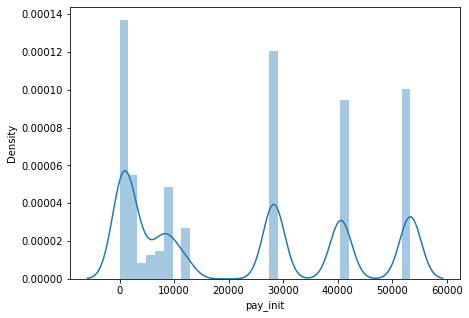

In [97]:
sns.distplot(data_new['pay_init'])

In [98]:
def tier(x):
    if x>40000:
        return 'Tier 1'
    elif x<40000 and x>30000:
        return 'Tier 2'
    elif x<30000 and x>20000:
        return 'Tier 3'
    elif x<20000 and x>10000:
        return 'Tier 4'
    elif x<10000 and x>5000:
        return 'Tier 5'
    else:
        return 'Tier 6'


In [99]:
data_new['City_Tier']=data_new['pay_init'].apply(tier)    

In [100]:
data_new

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,city,device,is_referral,given_permission_1,given_permission_2,is_churned,pay_init,City_Tier
0,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,Ahmedabad,samsung,0,1,0,0,8924.0,Tier 5
1,0,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Surat,xiaomi,1,1,0,0,8600.0,Tier 5
2,0,20.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,Kullu,xiaomi,1,0,1,0,31.0,Tier 6
3,0,20.0,2.0,4.0,1.0,2.0,322.0,20.0,0.0,0.0,Mumbai,oneplus,0,1,1,0,28299.0,Tier 3
4,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Pune,apple,0,1,1,0,11867.0,Tier 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104138,55,31.0,0.0,3.0,1.0,2.0,56.0,20.0,0.0,0.0,Ongole,samsung,1,1,0,1,423.0,Tier 6
104139,67,31.0,1.0,1.0,0.0,1.0,67.0,53.0,0.0,0.0,Chennai,vivo,1,1,0,1,7120.0,Tier 5
104140,67,31.0,3.0,2.0,0.0,2.0,137.0,0.0,0.0,0.0,Bangalore,apple,0,1,1,1,40587.0,Tier 1
104141,83,31.0,5.0,3.0,1.0,2.0,211.0,140.0,0.0,0.0,Hyderabad,samsung,0,0,1,1,28249.0,Tier 3


In [101]:
data_new.drop(['city','pay_init'],axis=1,inplace=True)

As city is binned so we are dropping orignal City Feature and Pay_init.

In [102]:
#Device is binned on the basis of friquency.

In [103]:
dic1=data_new['device'].value_counts().to_dict()
dic1

{'xiaomi': 24589,
 'samsung': 16256,
 'apple': 15106,
 'oneplus': 14337,
 'vivo': 8303,
 'oppo': 6927,
 'realme': 3543,
 'motorola': 3307,
 'huawei': 3157,
 'hmd global': 1708,
 'asus': 1447,
 'lenovo': 821,
 'google': 582,
 'lge': 289,
 'infinix mobility limited': 163,
 'gionee': 125,
 'sony': 106,
 '10or': 60,
 'htc': 50,
 'lemobile': 49,
 'micromax': 49,
 'infinix': 46,
 'blackberry': 45,
 'zuk': 42,
 'lava': 42,
 'panasonic': 39,
 'tecno mobile limited': 31,
 'coolpad': 30,
 'letv': 29,
 'tecno': 27,
 'yu': 23,
 'infocus': 21,
 'yulong': 20,
 'lyf': 16,
 'nubia': 13,
 'intex': 7,
 'zte': 6,
 'xolo': 6,
 'mobiistar': 6,
 'longcheer': 5,
 'smartron': 5,
 'blackshark': 5,
 'comio': 4,
 'meizu': 4,
 'ivoomi': 4,
 'tcl': 4,
 'sonimtech': 3,
 'vernee': 3,
 'billion': 2,
 'itel mobile limited': 2,
 'iball slide': 2,
 'haier': 2,
 'ulefone': 2,
 'foxconn international holdings limited': 2,
 'celkon': 2,
 'acer': 2,
 'lg electronics': 2,
 't54': 1,
 'elephone': 1,
 'unknown': 1,
 'centric':

In [104]:
data_new['device_qnt']=data_new['device'].map(dic1)

In [105]:
data_new

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,device,is_referral,given_permission_1,given_permission_2,is_churned,City_Tier,device_qnt
0,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,samsung,0,1,0,0,Tier 5,16256
1,0,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,xiaomi,1,1,0,0,Tier 5,24589
2,0,20.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,xiaomi,1,0,1,0,Tier 6,24589
3,0,20.0,2.0,4.0,1.0,2.0,322.0,20.0,0.0,0.0,oneplus,0,1,1,0,Tier 3,14337
4,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,apple,0,1,1,0,Tier 4,15106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104138,55,31.0,0.0,3.0,1.0,2.0,56.0,20.0,0.0,0.0,samsung,1,1,0,1,Tier 6,16256
104139,67,31.0,1.0,1.0,0.0,1.0,67.0,53.0,0.0,0.0,vivo,1,1,0,1,Tier 5,8303
104140,67,31.0,3.0,2.0,0.0,2.0,137.0,0.0,0.0,0.0,apple,0,1,1,1,Tier 1,15106
104141,83,31.0,5.0,3.0,1.0,2.0,211.0,140.0,0.0,0.0,samsung,0,0,1,1,Tier 3,16256


In [106]:
data_new['device'].value_counts()

xiaomi         24589
samsung        16256
apple          15106
oneplus        14337
vivo            8303
               ...  
leeco              1
yuho               1
fortuneship        1
inone              1
karbonn            1
Name: device, Length: 76, dtype: int64

In [107]:
def device_bin(x):
    if x>20000:
        return 'major devices 1'
    
    elif x>15000 and x<20000:
        return 'major devices 2'
    
    elif x>10000 and x<15000:
        return 'major devices 3'
    
    elif x>5000 and x<10000:
        return 'major devices 4'
    
    elif x>1000 and x<5000:
        return 'major devices 5'
    
    else:
        return 'other devices'


In [108]:
data_new['device_mapped']=data_new['device_qnt'].map(device_bin)

In [109]:
data_new.drop(['device_qnt','device'],axis=1,inplace=True)

In [110]:
data_new.reset_index(drop=True,inplace=True)
data_new

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,is_referral,given_permission_1,given_permission_2,is_churned,City_Tier,device_mapped
0,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0,1,0,0,Tier 5,major devices 2
1,0,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,Tier 5,major devices 1
2,0,20.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,Tier 6,major devices 1
3,0,20.0,2.0,4.0,1.0,2.0,322.0,20.0,0.0,0.0,0,1,1,0,Tier 3,major devices 3
4,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,1,0,Tier 4,major devices 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101492,55,31.0,0.0,3.0,1.0,2.0,56.0,20.0,0.0,0.0,1,1,0,1,Tier 6,major devices 2
101493,67,31.0,1.0,1.0,0.0,1.0,67.0,53.0,0.0,0.0,1,1,0,1,Tier 5,major devices 4
101494,67,31.0,3.0,2.0,0.0,2.0,137.0,0.0,0.0,0.0,0,1,1,1,Tier 1,major devices 2
101495,83,31.0,5.0,3.0,1.0,2.0,211.0,140.0,0.0,0.0,0,0,1,1,Tier 3,major devices 2


In [111]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101497 entries, 0 to 101496
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   first_payment_amount                   101497 non-null  int64  
 1   age                                    101497 non-null  float64
 2   number_of_cards                        101497 non-null  float64
 3   payments_initiated                     101497 non-null  float64
 4   payments_failed                        101497 non-null  float64
 5   payments_completed                     101497 non-null  float64
 6   payments_completed_amount_first_7days  101497 non-null  float64
 7   coins_redeemed_first_7days             101497 non-null  float64
 8   visits_feature_1                       101497 non-null  float64
 9   visits_feature_2                       101497 non-null  float64
 10  is_referral                            101497 non-null  

In [112]:
sc=StandardScaler()

In [113]:
ind_var=data_new.drop('is_churned',axis=1)
target_var=data_new['is_churned']

In [114]:
data_num=ind_var.select_dtypes(include=np.number)
for k in data_num.columns:
    data_num[k]=sc.fit_transform(data_num[[k]])
data_num    

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2
0,-0.475346,-1.622705,0.002627,-0.438657,-0.416061,-0.259512,-0.428733,-0.351309,4.419309,-0.284715
1,-0.475346,-1.622705,-0.530697,-0.438657,-0.416061,-0.259512,-0.428733,-0.351309,-0.383666,-0.284715
2,-0.475346,-1.622705,-0.530697,-0.203743,0.520840,-0.259512,-0.428733,-0.351309,-0.383666,-0.284715
3,-0.475346,-1.622705,0.002627,0.266086,0.520840,0.049205,2.025296,-0.041247,-0.383666,-0.284715
4,-0.475346,-1.622705,0.002627,-0.438657,-0.416061,-0.259512,-0.428733,-0.351309,-0.383666,1.959597
...,...,...,...,...,...,...,...,...,...,...
101492,0.274802,-0.213843,-1.064021,0.031172,0.520840,0.049205,-0.001946,-0.041247,-0.383666,-0.284715
101493,0.438470,-0.213843,-0.530697,-0.438657,-0.416061,-0.259512,0.081888,0.470355,-0.383666,-0.284715
101494,0.438470,-0.213843,0.535952,-0.203743,-0.416061,0.049205,0.615372,-0.351309,-0.383666,-0.284715
101495,0.656695,-0.213843,1.602600,0.031172,0.520840,0.049205,1.179342,1.819124,-0.383666,-0.284715


In [115]:
data_encode=ind_var[['City_Tier','device_mapped']]
data_encode=pd.get_dummies(data_encode,drop_first=True)


In [116]:
data_no_enc=ind_var[['is_referral','given_permission_1','given_permission_2']]
data_no_enc                  

,is_referral,given_permission_1,given_permission_2
0,0,1,0
1,1,1,0
2,1,0,1
3,0,1,1
4,0,1,1
...,...,...,...
101492,1,1,0
101493,1,1,0
101494,0,1,1
101495,0,0,1


# Logit Stats Model

In [117]:
import statsmodels
import statsmodels.api as sm

In [118]:
X=pd.concat([data_num,data_encode,data_no_enc],axis=1)
X['is_referral']=X['is_referral'].astype(int)
X['given_permission_1']=X['given_permission_1'].astype(int)
X['given_permission_2']=X['given_permission_2'].astype(int)


In [119]:

xc=sm.add_constant(X)
xtrain,xtest,ytrain,ytest=train_test_split(xc,target_var,test_size=0.30,random_state=42)


In [120]:

logit_model=sm.Logit(ytrain,xtrain).fit()
y_logit_pred=logit_model.predict(xtest)
print(roc_auc_score(ytest,y_logit_pred))
logit_model.summary()


Optimization terminated successfully.
         Current function value: 0.542546
         Iterations 7
0.7041693668664393


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_churned   No. Observations:                71047
Model:                          Logit   Df Residuals:                    71024
Method:                           MLE   Df Model:                           22
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                 0.09018
Time:                        14:49:41   Log-Likelihood:                -38546.
converged:                       True   LL-Null:                       -42367.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9272      0.033    -27.933      0.000      -0.992      -0.862
first_payment_amount                     -0.1475      0.023     -6.449      0.000      -0.192      -0.103
age                                       0.1416      0.009     16.535      0.000       0.125       0.158
number_of_cards                          -0.2071      0.010    -20.129      0.000      -0.227      -0.187
payments_initiated                       -0.3232      0.040     -8.151      0.000      -0.401      -0.245
payments_failed                           0.0841      0.016      5.151      0.000       0.052       0.116
payments_completed                       -0.3091      0.045     -6.920      0.000      -0.397      -0.222
payments_completed_amount_first_7days    -0.1983      0.034     -5.890      0.000      -0.264      -0.132
coins_redeemed_first_7days               -0.2611      0.025    -10.569      0.000      -0.309      -0.213
visits_feature_1                         -0.1115      0.011    -10.409      0.000      -0.133      -0.091
visits_feature_2                         -0.0598      0.011     -5.530      0.000      -0.081      -0.039
City_Tier_Tier 3                          0.0481      0.026      1.818      0.069      -0.004       0.100
City_Tier_Tier 4                         -0.0212      0.047     -0.447      0.655      -0.114       0.072
City_Tier_Tier 5                          0.7981      0.028     28.090      0.000       0.742       0.854
City_Tier_Tier 6                          0.2766      0.023     12.275      0.000       0.232       0.321
device_mapped_major devices 2             0.0873      0.024      3.632      0.000       0.040       0.134
device_mapped_major devices 3            -0.2925      0.031     -9.293      0.000      -0.354      -0.231
device_mapped_major devices 4             0.3580      0.028     12.883      0.000       0.304       0.413
device_mapped_major devices 5            -0.1153      0.030     -3.799      0.000      -0.175      -0.056
device_mapped_other devices               0.0971      0.054      1.809      0.070      -0.008       0.202
is_referral                               0.3477      0.018     19.284      0.000       0.312       0.383
given_permission_1                       -0.2916      0.024    -12.052      0.000      -0.339      -0.244
given_permission_2                       -0.3906      0.020    -20.031      0.000      -0.429      -0.352
=========================================================================================================
"""

In [121]:
y_logit_pred
logit_pred=[0 if x<0.5 else 1 for x in y_logit_pred]

              precision    recall  f1-score   support

           0       0.75      0.96      0.85     21720
           1       0.70      0.21      0.33      8730

    accuracy                           0.75     30450
   macro avg       0.73      0.59      0.59     30450
weighted avg       0.74      0.75      0.70     30450


recall_score : 0.2134020618556701
roc_auc_score : 0.5886071082759012


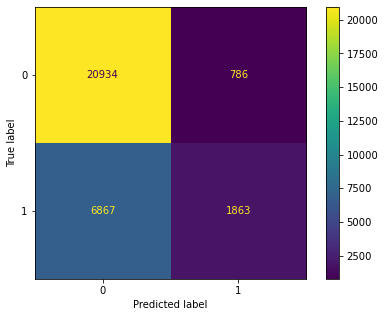

In [122]:
print(classification_report(ytest,logit_pred))
print()
print(ConfusionMatrixDisplay.from_predictions(ytest,logit_pred))
print('recall_score :',recall_score(ytest,logit_pred))
print('roc_auc_score :',roc_auc_score(ytest,logit_pred))

In [123]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import PowerTransformer

In [124]:
# po=PowerTransformer(standardize=False)
# X=po.fit_transform(X)

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(X,target_var,test_size=0.30,random_state=42)

# Decision Tree.

              precision    recall  f1-score   support

           0       0.77      0.76      0.77     21720
           1       0.43      0.44      0.44      8730

    accuracy                           0.67     30450
   macro avg       0.60      0.60      0.60     30450
weighted avg       0.67      0.67      0.67     30450



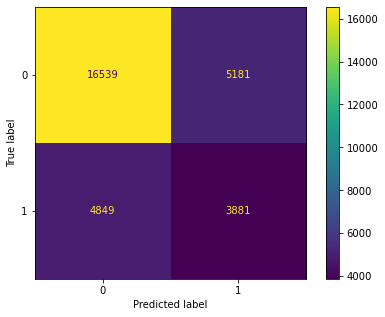

In [126]:
Decision_Tree=DecisionTreeClassifier()
model=Decision_Tree.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50898
           1       0.99      0.98      0.99     20149

    accuracy                           0.99     71047
   macro avg       0.99      0.99      0.99     71047
weighted avg       0.99      0.99      0.99     71047



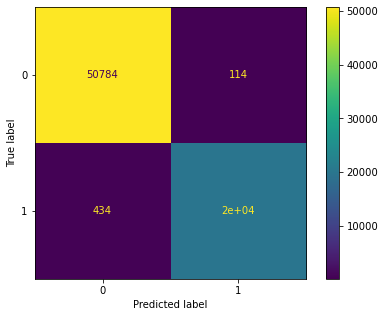

In [127]:
#train data report
Decision_Tree=DecisionTreeClassifier()
model=Decision_Tree.fit(xtrain,ytrain)
ypred=model.predict(xtrain)
print(classification_report(ytrain,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytrain,ypred))

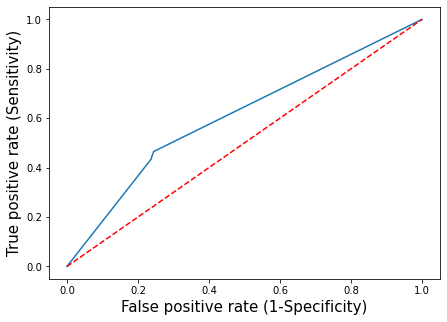

In [128]:
y_test_prob = model.predict_proba(xtest)[:,1]

fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()

In [129]:
Decision_Tree=DecisionTreeClassifier()
kf=KFold(shuffle=True,random_state=42)
score=cross_val_score(Decision_Tree,X,target_var,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(Decision_Tree,X,target_var,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(score))*100
print('Average roc-auc :',Average_Score)
print('Average recall :',Average_score_recall)

Average roc-auc : 60.758291038786204
Average recall : 44.845102268790235


In [152]:
Random_forest=RandomForestClassifier()
kf=KFold(shuffle=True,random_state=42)
score=cross_val_score(Random_forest,X,target_var,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(Random_forest,X,target_var,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(score))*100
print('Average_roc-auc_Score :',Average_Score)
print('Average score recall :',Average_score_recall)

Average_roc-auc_Score : 72.0771152739642
Average score recall : 35.837549776743984


              precision    recall  f1-score   support

           0       0.78      0.93      0.85     21720
           1       0.68      0.36      0.47      8730

    accuracy                           0.77     30450
   macro avg       0.73      0.65      0.66     30450
weighted avg       0.75      0.77      0.74     30450



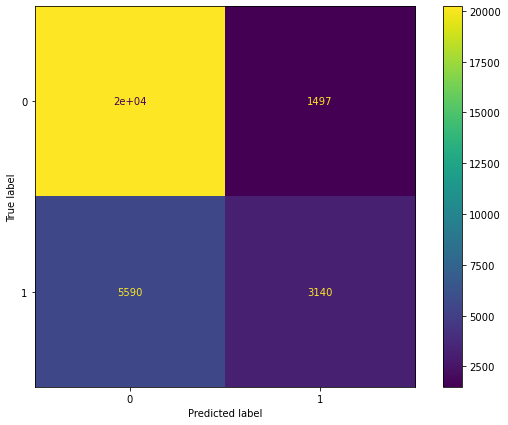

In [189]:
Random_forest=RandomForestClassifier()
rf_model=Random_forest.fit(xtrain,ytrain)
ypred=rf_model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))


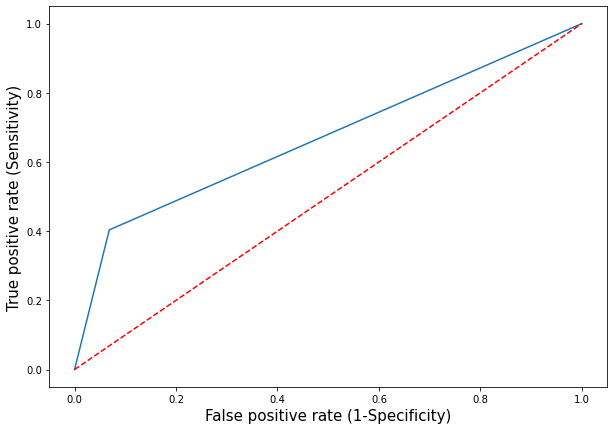

In [190]:
y_test = ada_model.predict(xtest)

fpr,tpr,thresholds = roc_curve(ytest,y_test)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
# rf_tuning=({'n_estimators':[100,200,300],   
#             'criterion':['gini','entropy'],
#            'min_samples_split':[2,3,4],
#            'min_samples_leaf':[1,2,3]})


In [132]:
# Grid=GridSearchCV(estimator=rf,param_grid=rf_tuning,cv=5)
# Grid.fit(xtrain,ytrain)
# Grid.best_params_

#bestrparams
* criterion='entropy',
* min_samples_leaf=3,
* min_samples_split=4
* n_estimators=300

              precision    recall  f1-score   support

           0       0.82      0.44      0.58     21720
           1       0.35      0.76      0.48      8730

    accuracy                           0.53     30450
   macro avg       0.59      0.60      0.53     30450
weighted avg       0.69      0.53      0.55     30450


recall_score : 0.7577319587628866
recall_score : 0.6007122040591597


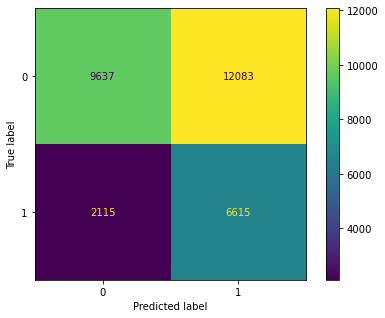

In [133]:
Naive_bayes=GaussianNB()
gb_model=Naive_bayes.fit(xtrain,ytrain)
ypred=gb_model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))
print()
print('recall_score :',recall_score(ytest,ypred))
print('recall_score :',roc_auc_score(ytest,ypred))

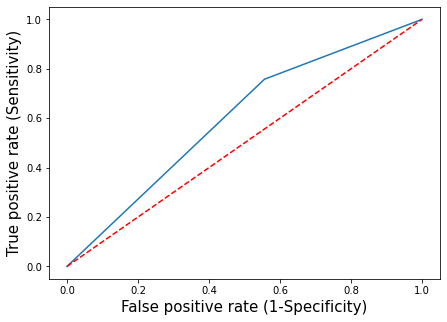

In [134]:
y_test = gb_model.predict(xtest)

fpr,tpr,thresholds = roc_curve(ytest,y_test)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()

In [135]:
naive_tuning=({'var_smoothing':np.linspace(0,-9,100)})

In [136]:

grd_model=GridSearchCV(estimator=Naive_bayes,param_grid=naive_tuning,cv=5)
grd_model.fit(xtrain,ytrain)
grd_model.best_params_

{'var_smoothing': 0.0}

              precision    recall  f1-score   support

           0       0.82      0.44      0.58     21720
           1       0.35      0.76      0.48      8730

    accuracy                           0.53     30450
   macro avg       0.59      0.60      0.53     30450
weighted avg       0.69      0.53      0.55     30450


recall_score : 0.7577319587628866
recall_score : 0.6007122040591597


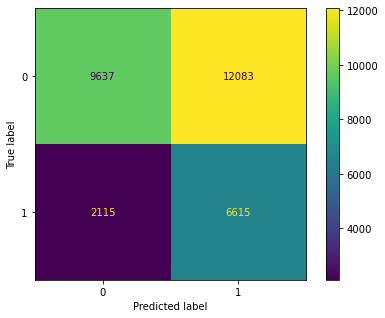

In [137]:

Naive_bayes=GaussianNB(var_smoothing=0.0)
gb_model=Naive_bayes.fit(xtrain,ytrain)
ypred=gb_model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))
print()
print('recall_score :',recall_score(ytest,ypred))
print('recall_score :',roc_auc_score(ytest,ypred))

In [158]:
KNeighbors=KNeighborsClassifier()
kf=KFold(shuffle=True,random_state=42)
score=cross_val_score(KNeighbors,X,target_var,scoring='roc_auc',cv=kf)
Average_Score=(np.mean(score))*100
Average_Score

65.33099709226849

              precision    recall  f1-score   support

           0       0.77      0.87      0.81     21720
           1       0.51      0.35      0.42      8730

    accuracy                           0.72     30450
   macro avg       0.64      0.61      0.62     30450
weighted avg       0.70      0.72      0.70     30450

0.35005727376861395
roc_auc_score : 0.6087072740850437
recall : 0.35005727376861395


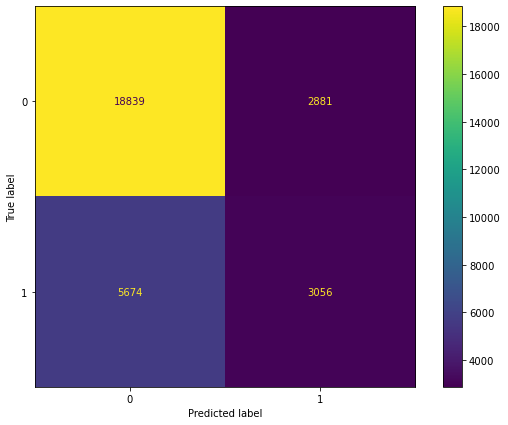

In [175]:
KNeighbors=KNeighborsClassifier()
k_model=KNeighbors.fit(xtrain,ytrain)
ypred=k_model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))
print(recall_score(ytest,ypred)) #true_positive/(true_positive+false_negative)
print('roc_auc_score :',roc_auc_score(ytest,ypred))
print('recall :',recall_score(ytest,ypred))


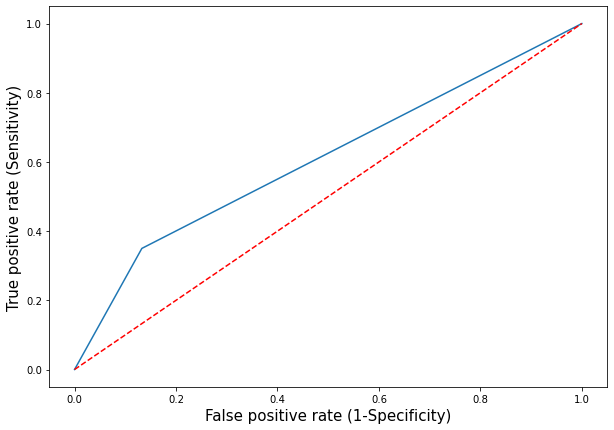

In [176]:
y_test = k_model.predict(xtest)

fpr,tpr,thresholds = roc_curve(ytest,y_test)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()

In [160]:
Ada_Boost=AdaBoostClassifier()
kf=KFold(shuffle=True,random_state=42)
Average_roc_auc=cross_val_score(Ada_Boost,X,target_var,scoring='roc_auc',cv=kf)
Average_recall=cross_val_score(Ada_Boost,X,target_var,scoring='recall',cv=kf)

print('Average roc auc :',(np.mean(Average_roc_auc))*100)
print('Average_recall :',(np.mean(Average_recall))*100)

Average roc auc : 75.31465138615759
Average_recall : 40.06508002387153


              precision    recall  f1-score   support

           0       0.80      0.93      0.86     21720
           1       0.70      0.40      0.51      8730

    accuracy                           0.78     30450
   macro avg       0.75      0.67      0.69     30450
weighted avg       0.77      0.78      0.76     30450



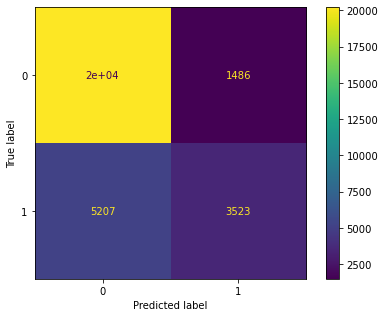

In [161]:
Ada_Boost=AdaBoostClassifier()
ada_model=Ada_Boost.fit(xtrain,ytrain)
ypred=ada_model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))


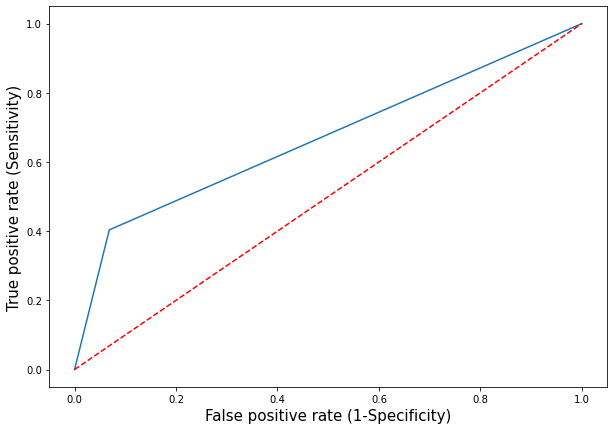

In [177]:
y_test = ada_model.predict(xtest)

fpr,tpr,thresholds = roc_curve(ytest,y_test)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()

In [162]:
XGB=XGBClassifier()
kf=KFold(shuffle=True,random_state=42)
score_roc_auc=cross_val_score(XGB,X,target_var,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(XGB,X,target_var,scoring='recall',cv=kf)

print('Average roc auc score :',(np.mean(score_roc_auc))*100)
print('Average recall score :',(np.mean(score_recall))*100)


Average roc auc score : 75.20573739743355
Average recall score : 38.66616061688501


              precision    recall  f1-score   support

           0       0.79      0.94      0.86     21720
           1       0.72      0.39      0.50      8730

    accuracy                           0.78     30450
   macro avg       0.75      0.66      0.68     30450
weighted avg       0.77      0.78      0.76     30450



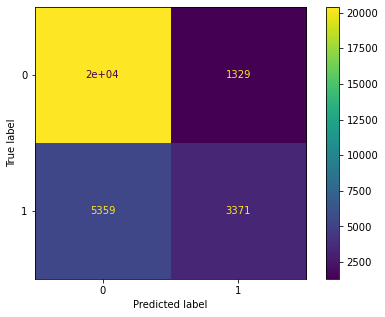

In [163]:
XGB=XGBClassifier()
xg_model=XGB.fit(xtrain,ytrain)
ypred=xg_model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))

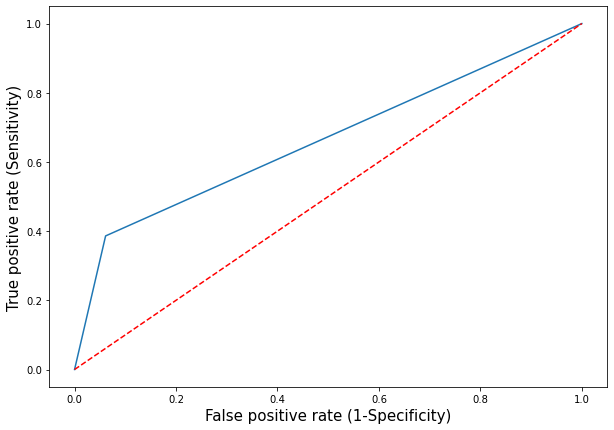

In [178]:
y_test = xg_model.predict(xtest)

fpr,tpr,thresholds = roc_curve(ytest,y_test)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()

In [164]:
clfs = {
    'KNeighbors' : KNeighborsClassifier(),
    'Naive_bayes' : GaussianNB(),
    'Decision_Tree' : DecisionTreeClassifier(),
    'Random_forest' : RandomForestClassifier(),
    'Ada_Boost' : AdaBoostClassifier(),
    'XGB':XGBClassifier()
}

models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'roc auc', 'f1 score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print('Fitting model...', clf_name)
    t = {'model name' : clf_name,
        'accuracy' : accuracy_score(ytest,y_pred),
        'recall' : recall_score(ytest,y_pred),
        'precision' : precision_score(ytest,y_pred),
         'roc auc' : roc_auc_score(ytest,y_pred),
        'f1 score' : f1_score(ytest,y_pred),
         'cohen_kappa_score' : cohen_kappa_score(ytest,y_pred)
        }
    models_report = models_report.append(t, ignore_index=True)

models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report


Fitting model... KNeighbors
Fitting model... Naive_bayes
Fitting model... Decision_Tree
Fitting model... Random_forest
Fitting model... Ada_Boost
Fitting model... XGB


,model name,accuracy,recall,precision,roc auc,f1 score,cohen_kappa_score
4,Ada_Boost,0.780197,0.403551,0.703334,0.667567,0.512847,0.384090
5,XGB,0.780361,0.38614,0.717234,0.662476,0.50201,0.376993
1,Naive_bayes,0.533727,0.757732,0.353781,0.600712,0.482354,0.150155
3,Random_forest,0.766601,0.358648,0.67493,0.64461,0.468397,0.336353
2,Decision_Tree,0.672578,0.44433,0.431096,0.604324,0.437613,0.206751
0,KNeighbors,0.719048,0.350057,0.514738,0.608707,0.416718,0.240415


In [165]:
Random_forest=RandomForestClassifier(n_estimators=300,min_samples_leaf=3,min_samples_split=4,criterion='entropy')
kf=KFold(shuffle=True,random_state=42)
score=cross_val_score(Random_forest,X,target_var,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(Random_forest,X,target_var,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(score))*100
print('Average_roc-auc_Score :',Average_Score)
print('Average score recall :',Average_score_recall)

Average_roc-auc_Score : 74.75624528163232
Average score recall : 37.59875495038884


              precision    recall  f1-score   support

           0       0.79      0.94      0.86     21720
           1       0.72      0.38      0.49      8730

    accuracy                           0.78     30450
   macro avg       0.75      0.66      0.68     30450
weighted avg       0.77      0.78      0.75     30450



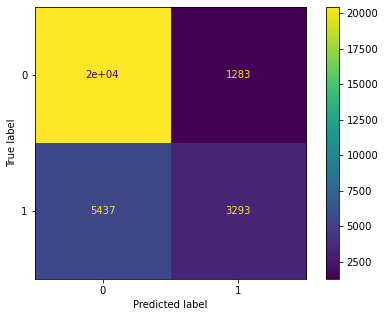

In [166]:
Random_forest=RandomForestClassifier(n_estimators=300,min_samples_leaf=3,min_samples_split=4,criterion='entropy')
model=Random_forest.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred))


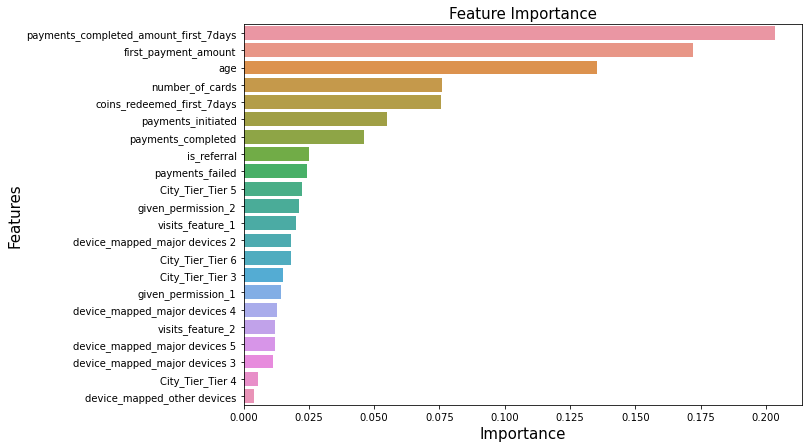

In [168]:
plt.rcParams['figure.figsize']=[10,7]
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({ 'Features': X.columns,
                                   'Importance': model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [169]:
model.feature_importances_

array([0.17211279, 0.13530262, 0.07605594, 0.05503434, 0.02426094,
       0.04604075, 0.20348647, 0.0755217 , 0.0199182 , 0.01215377,
       0.01512266, 0.00543948, 0.0223901 , 0.0180941 , 0.01834488,
       0.01145712, 0.01262126, 0.01184662, 0.00392221, 0.02510314,
       0.01446029, 0.02131061])

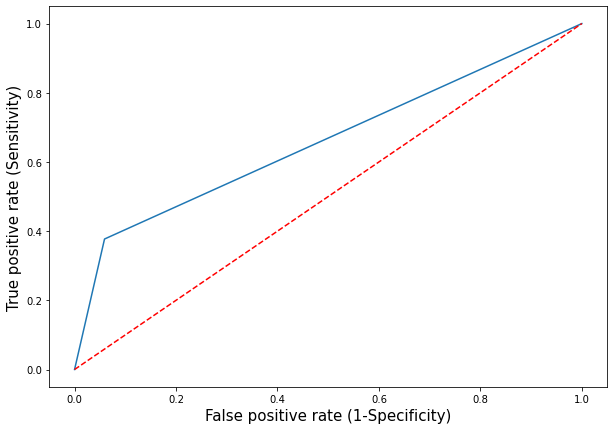

In [170]:
y_test = model.predict(xtest)

fpr,tpr,thresholds = roc_curve(ytest,y_test)

plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.show()